![osu logo](./images/osu-32px-horiz.png)
<hr size="6" style="color:#d65828;background-color:#d65828;border:none;">

# Interactive Jupyther Tutorial 2 : With Iris Dataset

This is a really quick tutorial on getting more familiar with iris dataset. 

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The below table shows the top 5 entries in the dataset. See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more information on this dataset.

>### _Objective of this tutorial:_
> * _Help you get more familiar with the iris dataset._

_Stuck at any point? Look up jupyter [documentation](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html#notebook)._

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd

# import some data to play with
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(4, "Target", iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Lets do the same things that we did with the us-accidents dataset. Lets draw a distribution curve for each of the four columns.

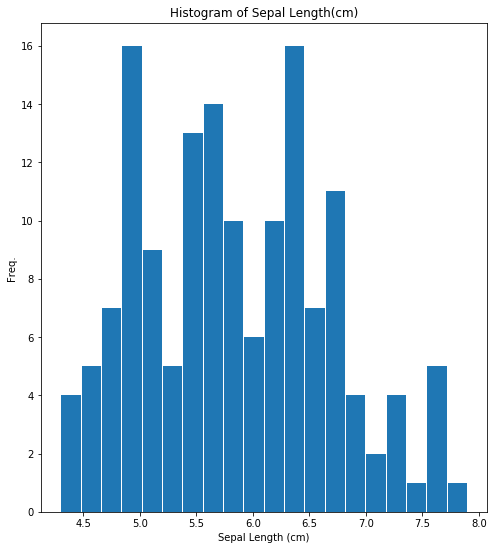

In [2]:
import numpy as np

# this configuration is used by pandas .hist call below.
fig, ax = plt.subplots(figsize=(8,9))

ax.set_title("Histogram of Sepal Length(cm)")
ax.set_ylabel("Freq.")
ax.set_xlabel("Sepal Length (cm)")
# pandas has some common builtin matplotlib plots that are useful in doing common analysis
df['sepal length (cm)'].hist(bins=20, rwidth=0.95, grid=False)

Lets look at 2d datapoints for petal. Here we will plot scatter points with petal width as x axis and petal length as y axis.

Text(0, 0.5, 'Petal Length')

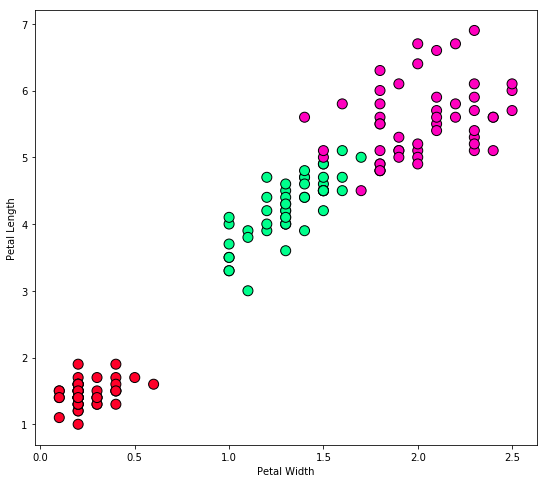

In [28]:
plt.figure(figsize=(9,8))
plt.scatter(x=df['petal width (cm)'], y=df['petal length (cm)'], c=df['Target'], cmap='gist_rainbow', edgecolor='k', s=100)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

If you want to cluster this through k-means clustering

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
mat = df.iloc[:, :4].to_numpy()
km.fit(mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [13]:
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'Predicted')

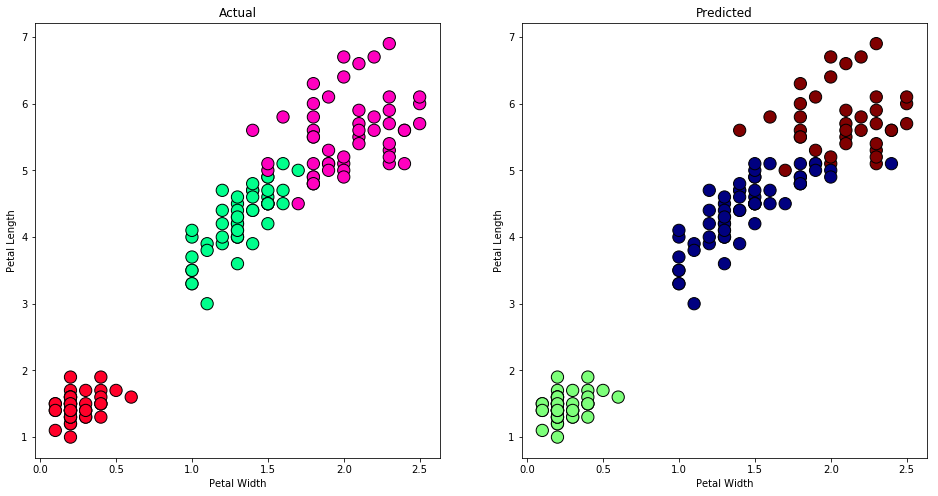

In [29]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.scatter(mat[:, 3], mat[:, 2], c=df['Target'], cmap='gist_rainbow',
edgecolor='k', s=150)
ax2.scatter(mat[:, 3], mat[:, 2], c=new_labels, cmap='jet',
edgecolor='k', s=150)

ax1.set_xlabel('Petal Width')
ax1.set_ylabel('Petal Length')
ax2.set_xlabel('Petal Width')
ax2.set_ylabel('Petal Length')

ax1.set_title('Actual')
ax2.set_title('Predicted')